# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Task 1

In [34]:
# read the iris data into a pandas DataFrame, including column names

df=pd.read_csv('iris.csv')


## Task 2

In [35]:
# gather basic information

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Task 3

In [27]:
# use groupby to look for differences between the species

df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [28]:
# use sorting to look for differences between the species
df.species.value_counts().sort_values(ascending=False)

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:>

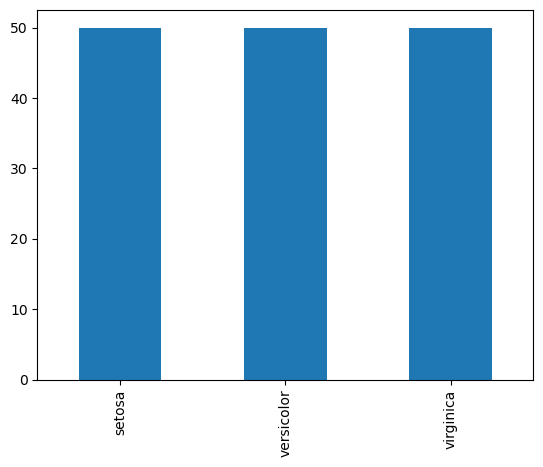

In [36]:
# use plotting to look for differences between the species
df.species.value_counts().plot.bar()

In [37]:
df.species

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [38]:
# map species to a numeric value so that plots can be colored by category

df.species_new = df.species.replace("setosa", 1 ).replace("versicolor", 2 ).replace("virginica", 3 )

C:\Users\PC11\AppData\Local\Temp\ipykernel_21436\4025888277.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.species_new = df.species.replace("setosa", 1 ).replace("versicolor", 2 ).replace("virginica", 3 )


<AxesSubplot:>

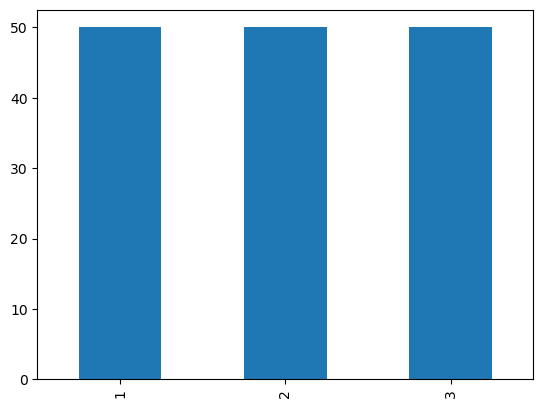

In [39]:
df.species_new.value_counts().plot.bar()

## Task 4

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [63]:
s=SVC()

In [64]:
x,y=df.drop("species", axis=1),df["species"]

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [67]:
pred=s.fit(x_train,y_train).predict(x_test)

In [68]:
confusion_matrix(y_test,pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [69]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Bonus

In [70]:
# define function that accepts a row of data and returns a predicted species
s.predict([[5.9,3.0,5.1,1.8]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)

In [81]:
def fnc_iris_species (psepal_len,psepal_wid,ppepal_len,ppepal_wid):
    return s.predict([[psepal_len,psepal_wid,ppepal_len,ppepal_wid]])

In [82]:
fnc_iris_species(5.9,3.0,5.1,1.8)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)